# Attenutation as a function of Al absorption thickness
## (Verification of Lambert's law)

By completing this python notebook you will analyse your experimental count rate measurements of x-rays passing through aluminium to determine if Lambert's Law holds. You'll also estimate the linear attenuation, $\mu$, of Aluminium with respect to x-rays. As part of this analysis you'll be graphing and curve fitting your data, so you need to begin by importing the necessary modules into python.

Step 1. Import numpy and pyplot from matlibplot.

In [1]:
#you can just run this cell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Measurements taken with Zr filter

Step 2. Enter your experimental data from Table 1 measured WITH the zirconium filter. Make sure your three 1-d arrays, thickness, rawR (mean count rate) and sigmaRawR (uncertainty in count rate) have the same number of entries as each other.

In [2]:
#thickness data
thickness=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
#Mean count rate data
rawR_Zr=np.array([356.500, 149, 63.260, 27.510, 12.470, 6.505, 3.080])
#uncertainty in count rate data
sigmaRawR_Zr=np.array([1.335, 0.863, 0.562, 0.371, 0.250, 0.180, 0.124])

Step 3. Enter the background count rate and its uncertainty. 

In [3]:
#input mean background count rate
Rb=0.194
#input uncertainty in background count rate
sigmaRb=0.025

Step 4. You are now going to calculate the transmission fractions for each thickness of aluminium using Equation (1a) from the lab manual, i.e.

$T=\frac{(R-R_b)}{(R_0-R_b)}.$

The value of $R_0$ in the equation is the mean count rate when the aluminium thickness was 0mm. We taken the maximum value of the array rawR to obtain R0. 

In [4]:
#max count rate occurs for Al thickness = 0
R0_Zr=rawR_Zr.max()
#uncertainty of R0 
sigmaR0_Zr=sigmaRawR_Zr[rawR_Zr==R0_Zr]
#Complete using above equation to calculate transmission measured with Zr filter
TZr=(rawR_Zr-Rb)/(R0_Zr-Rb)
#Now take the natural log of the transmission ready for plotting against thickness.
lnTZr=np.log(TZr)

print(TZr)
print(lnTZr)

[1.         0.4176354  0.17699955 0.07666444 0.03445353 0.0177123
 0.00809978]
[ 0.         -0.87314647 -1.73160812 -2.5683173  -3.36814378 -4.03349577
 -4.81591845]


Since $T$ is given by,

$T=\frac{(R-R_b)}{(R_0-R_b)}\\
\ln{T}=\ln{(R-R_b)}-\ln{(R_0-R_b)}.$

Due to the uncertainties in $R, R_0, R_b$ there will be uncertainty in our calculated value $\ln{T}$.

The general rule for calculating the statistical uncertainty in a quantity $q$ which depends on independent random variables $x,y,\text{ and }z$ is:

$\sigma_q=\sqrt{(\frac{\partial q}{\partial x}\sigma_x)^2+(\frac{\partial q}{\partial y}\sigma_y)^2+(\frac{\partial q}{\partial z}\sigma_z)^2}\\
\text{where } \frac{\partial q}{\partial x} \text{ is the partial derivative of } q \text{ with respect to }x.$

So applying this rule to $\ln{T}$ we get:

$\sigma_{\ln{T}}=\sqrt{(\frac{\partial \ln{T}}{\partial R}\sigma_{R})^2+(\frac{\partial \ln{T}}{\partial R_0}\sigma_{R_0})^2+(\frac{\partial \ln{T}}{\partial R_b}\sigma_{R_b})^2}$. 

Partial differentiation of the expression for $\ln{T}$ gives;

$\begin{equation}
\frac{\partial \ln{T}}{\partial R}=(R-R_b)^{-1},\\
\frac{\partial \ln{T}}{\partial R_0}=-(R_0-R_b)^{-1},\\
\frac{\partial \ln{T}}{\partial R_b}=(R_0-R_b)^{-1}-(R-R_b)^{-1}.
\end{equation}$

Step 5. Use these expressions of the partial derivatives and $\sigma_{\ln{T}}$ to calculate the uncertainty in $\ln{T}$.

In [15]:
partialR=1.0/(rawR_Zr-Rb)
partialR0=-1.0/(R0_Zr-Rb)
partialRb=(1.0/(R0_Zr-Rb)-1.0/(rawR_Zr-Rb))
#The following line has been completed for you
sigmalnTZr=np.sqrt((partialR*sigmaRawR_Zr)**2+(partialR0*sigmaR0_Zr)**2+(partialRb*sigmaRb)**2)
print(sigmalnTZr)

[0.00529875 0.00690522 0.00967244 0.01411444 0.02079989 0.02902866
 0.04397667]


Step 6. Make an initial plot of $\ln{T}$ as a function of thickness, $x$.

Text(0.5,0.98,'Natural logarithm of the transmission of x-rays through Al\n as a function of Al thickness.')

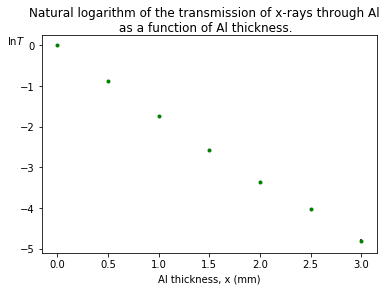

In [6]:
#you can just run this cell
plt.errorbar(thickness,lnTZr,yerr=sigmalnTZr,ls="none",marker=".",c="g",ecolor="k",label='with Zr filter')
plt.xlabel("Al thickness, x (mm)")
plt.ylabel("$\ln{T}$",position=(0,0.95),rotation="horizontal")
plt.suptitle("Natural logarithm of the transmission of x-rays through Al\n as a function of Al thickness.")

From the looks of your plotted experimental data, do you think Lambert's Law holds? 


If you think it does, continue with step 7.


Step 7. Determine the best fitting straight line relationship between thickness and $\ln{T}$ using np.polyfit. 

Also get np.polyfit to return the covariance matrix from the fit. The square root of the diagonal elements in the covariance matrix are the standard deviation of the fitted parameters, which is a measure of their uncertainty.

In [21]:
lnTZr=np.array([ 0.,-0.87314647, -1.73160812, -2.5683173,  -3.36814378, -4.03349577, -4.81591845])

thickness=([0, 0.5, 1, 1.5, 2, 2.5, 3])

In [29]:
#complete the polyfit statement for a polynomial of degree 1 and weight by the inverse of the uncertainty sigmalnTZr
lnTZrParam, covParam=np.polyfit(lnTZr,thickness,1,rcond=None, full=False, w=1/sigmalnTZr, cov=False) 
#make a label for this line of best fit
lnTZrlinelabel='LoBF'

#Calculating uncertainty in fitted parameters
sd_lnTZrParam=np.sqrt(np.diag(covParam))
#Complete the following print statements and record the results in your lab books.
# print("Gradient of fitted line is {:.4f}".format(lnTZrParam[0]))
print("Intercept of fitted line is {:.4f}")
# print("Standard deviation in gradient of fitted line is {:.4f}".format(sd_lnTZrParam[0]))
print("Standard deviation in intercept of fitted line is {:.4f}")

ValueError: Input must be 1- or 2-d.

The gradient of the best fitting line, along with its uncertainty, is your experimental estimate of the attenuation coefficient $\mu$ for aluminium, made from data collected with the use of a Zr filter. 

Step 8. Now produce the data for this best fitting line with 'np.polyval' and plot it along with your experimental data. 

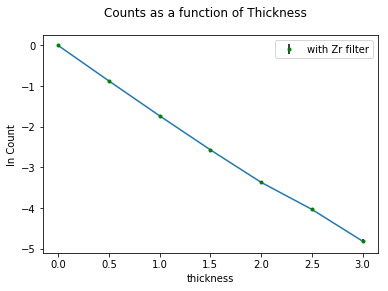

In [46]:
# lnTZrBestLine=np.polyval(lnTZrParam,thickness)
#plotting log of experimental data with markers only and label it
plt.errorbar(thickness,lnTZr,yerr=sigmalnTZr,ls="none",marker=".",c="g",ecolor="k",label='with Zr filter')
#plot line of best fit using only a line in a different colour and label it
plt.plot(thickness,lnTZr)
#add axes labels
plt.xlabel('thickness')
plt.ylabel('Counts')    
#add title
plt.suptitle('Counts as a function of Thickness')    
#add legend
plt.legend()    

## Measurements taken without Zr filter

Repeat steps 2, 4, 5, 7 and 8 with your experimental data taken WITHOUT the Zr filter, to estimate the attenuation coefficient of aluminium, $\mu$, made without the use of the Zr filter.

In [31]:
1461,1432,#step 2- enter mean count rate data without Zr filter
rawR_noZr=np.array([1758,780.8,371.8,181.7,93.68,54.37,29.89])
#uncertainty of count rate without Zr filter
sigmaRawR_noZr=np.array([2.965,1.976,1.3634,0.9531,0.6844,0.5214,0.3866])

In [35]:
#Step 4 - calculating natural log of the transmission of x-rays WITHOUT the Zr filter. Rb is the same WITH/OUT filter.
R0_noZr=rawR_noZr.max()
sigmaR0_noZr=sigmaRawR_noZr[rawR_noZr==R0_noZr]
#Calculate transmission measured without Zr filter
T_noZr=(rawR_noZr-Rb)/(R0_noZr-Rb)
#Now take the natural log of the transmission ready for plotting against thickness.
lnT_noZr=np.log(T_noZr)

print(T_noZr)
print(lnT_noZr)

[1.         0.44407972 0.21140331 0.10325713 0.05318334 0.03082024
 0.01689379]
[ 0.         -0.81175118 -1.55398757 -2.27053301 -2.93401003 -3.47958371
 -4.08080936]


In [36]:
#Step 5 - complete to calculate uncertainty in ln(T) WITHOUT Zr filter, via partial derivatives
partialR_noZr=1.0/(rawR_noZr-Rb)
partialR0_noZr=-1.0/(R0_noZr-Rb)
partialRb_noZr=(1.0/(R0_noZr-Rb)-1.0/(rawR_noZr-Rb))
sigmalnT_noZr=np.sqrt((partialR_noZr*sigmaRawR_noZr)**2+(partialR0_noZr*sigmaR0_noZr)**2+(partialRb_noZr*sigmaRb)**2)

In [40]:
#Step 7 - complete the polyfit statement to fit a polynomial of degree 1, weighted by 1/sigmalnT_noZr
lnT_noZrParam, noZrCovParam=np.polyfit(thickness,lnT_noZr,1,w=1/sigmalnT_noZr)
#make an appropriate label for this best fitting line
lnT_noZrlinelabel='LoBF'
#Calculating uncertainty in fitted parameters
sd_lnT_noZrParam=np.sqrt(np.diag(noZrCovParam))
#Complete the following print statements and record the results in your lab books.
print("Gradient of fitted line for no Zr filter is {:.4f}".format(lnT_noZrParam[0]))
print("Intercept of fitted line for noZr filter is {:.4f}")
print("Std. dev. in gradient of fitted line is {:.4f}".format(sd_lnT_noZrParam[0]))
print("Std. dev. in intercept of fitted line is {:.4f}")
#Making data from best fit line to data without Zr filter using polyval 
lnT_noZrBestLine=np.polyval(lnT_noZrParam,thickness)

ValueError: Input must be 1- or 2-d.

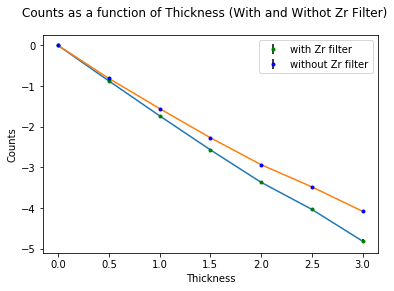

In [48]:
#step 8 - plotting both sets of data and their best fitting lines
plt.errorbar(thickness,lnTZr,yerr=sigmalnTZr,ls="none",marker=".",c="g",ecolor="k",label='with Zr filter')
plt.errorbar(thickness,lnT_noZr,yerr=sigmalnT_noZr,ls="none",marker=".",c="b",ecolor="k",label='without Zr filter')
#plotting both lines of best fit and labelling
plt.plot(thickness,lnTZr)
plt.plot(thickness,lnT_noZr)
#add axes labels
plt.xlabel('Thickness')
plt.ylabel('Counts')
#add title
plt.suptitle ('Counts as a function of Thickness (With and Without Zr Filter)')    
#add legend
plt.legend()
#Enter an appropriate filename for the plot
plt.savefig("myplot.pdf",dpi=300,orientation="landscape")

In [16]:
np.polyfit?

### Now print out a hard copy of the pdf file containing your graph and stick it in your lab book!